# Email Campaign - Take Home Challenge 7

In [106]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
pd.options.display.max_rows=20
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score,f1_score, roc_curve,auc,accuracy_score
from sklearn.ensemble import RandomForestClassifier

C:\Users\ljohn\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
#import data
emails=pd.read_csv(r"C:\Users\ljohn\Documents\2019\Personal\Projects\Data\Project 7 - Email Campaign/email_table.csv")
emails_opened=pd.read_csv(r"C:\Users\ljohn\Documents\2019\Personal\Projects\Data\Project 7 - Email Campaign/email_opened_table.csv")
emails_link_clicked=pd.read_csv(r"C:\Users\ljohn\Documents\2019\Personal\Projects\Data\Project 7 - Email Campaign/link_clicked_table.csv")

###### Explore emails dataset

In [9]:
emails.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases
0,85120,short_email,personalized,2,Sunday,US,5
1,966622,long_email,personalized,12,Sunday,UK,2
2,777221,long_email,personalized,11,Wednesday,US,2
3,493711,short_email,generic,6,Monday,UK,1
4,106887,long_email,generic,14,Monday,US,6


In [10]:
emails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
email_id               100000 non-null int64
email_text             100000 non-null object
email_version          100000 non-null object
hour                   100000 non-null int64
weekday                100000 non-null object
user_country           100000 non-null object
user_past_purchases    100000 non-null int64
dtypes: int64(3), object(4)
memory usage: 5.3+ MB


In [102]:
emails.hour = emails.hour.astype('object') 

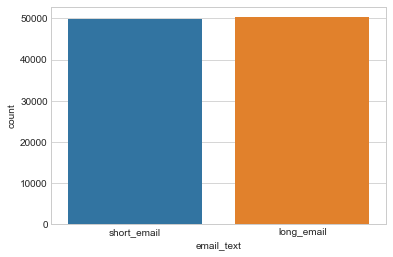

In [12]:
sns.countplot(emails.email_text)

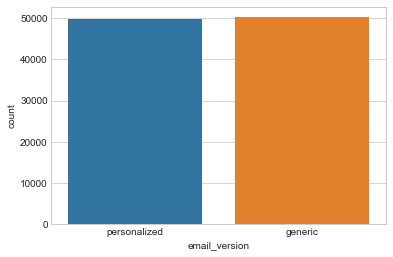

In [13]:
sns.countplot(emails.email_version)

In [18]:
ct=pd.crosstab(emails.email_text,emails.email_version)
stacked = ct.stack().reset_index().rename(columns={0:'value'})

In [19]:
stacked

,email_text,email_version,value
0,long_email,generic,25236
1,long_email,personalized,25040
2,short_email,generic,24973
3,short_email,personalized,24751


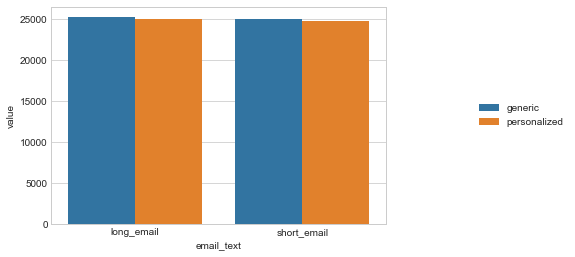

In [21]:
sns.barplot(x=stacked.email_text, y=stacked.value, hue=stacked.email_version)
plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

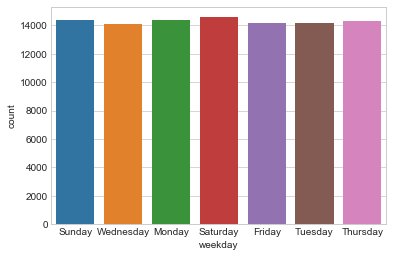

In [22]:
sns.countplot(emails.weekday)

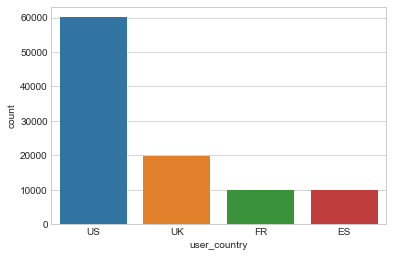

In [23]:
sns.countplot(emails.user_country)

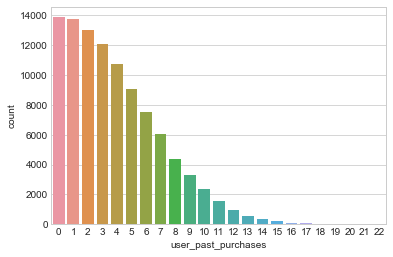

In [24]:
sns.countplot(emails.user_past_purchases)

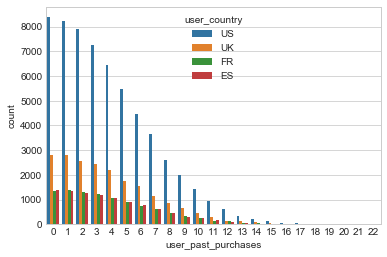

In [25]:
sns.countplot(emails.user_past_purchases,hue=emails.user_country)

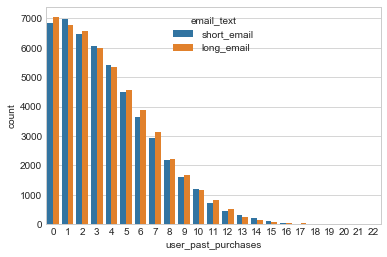

In [26]:
sns.countplot(emails.user_past_purchases,hue=emails.email_text)

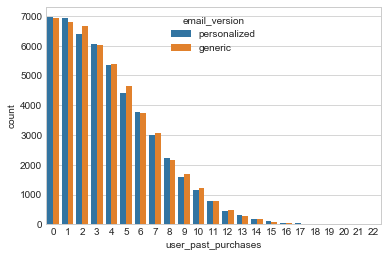

In [27]:
sns.countplot(emails.user_past_purchases,hue=emails.email_version)

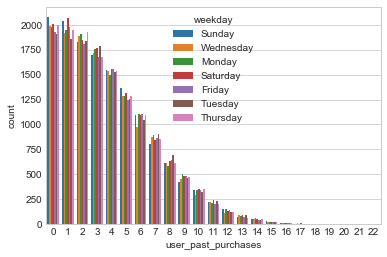

In [28]:
sns.countplot(emails.user_past_purchases,hue=emails.weekday)

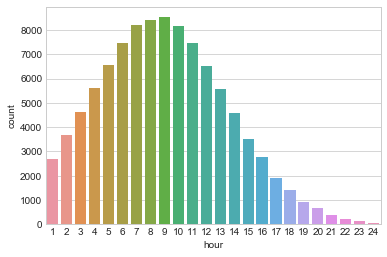

In [30]:
sns.countplot(emails.hour)

###### Explore emails opened dataset

In [34]:
emails_opened.head()

,email_id
0,284534
1,609056
2,220820
3,905936
4,164034


In [59]:
#Join Emails_Opened to Emails table as flag
emails['email_opened'] = emails['email_id'].isin(emails_opened['email_id'])
emails.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,email_opened
0,85120,short_email,personalized,2,Sunday,US,5,False
1,966622,long_email,personalized,12,Sunday,UK,2,True
2,777221,long_email,personalized,11,Wednesday,US,2,False
3,493711,short_email,generic,6,Monday,UK,1,False
4,106887,long_email,generic,14,Monday,US,6,False


###### Explore emails link clicked dataset

In [60]:
emails_link_clicked.head()

,email_id
0,609056
1,870980
2,935124
3,158501
4,177561


In [61]:
#Join Emails_link_clicked to Emails table as flag
emails['email_link_clicked'] = emails['email_id'].isin(emails_link_clicked['email_id'])
emails.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,email_opened,email_link_clicked
0,85120,short_email,personalized,2,Sunday,US,5,False,False
1,966622,long_email,personalized,12,Sunday,UK,2,True,True
2,777221,long_email,personalized,11,Wednesday,US,2,False,False
3,493711,short_email,generic,6,Monday,UK,1,False,False
4,106887,long_email,generic,14,Monday,US,6,False,False


### What percentage of users opened the email and what percentage clicked on the link within the email?

In [83]:
print("Percentage of users who opened email : ",(emails[emails.email_opened==True].size/emails.size)*100,"%")
print("Percentage of users who clicked link in email : ",(emails[emails.email_link_clicked==True].size/emails.size)*100,"%")
print("Percentage of users who clicked link among who opened email : ",(emails[emails.email_link_clicked==True].size/emails[emails.email_opened==True].size)*100,"%")

Percentage of users who opened email :  10.345 %
Percentage of users who clicked link in email :  2.119 %
Percentage of users who clicked link among who opened email :  20.4833252779 %


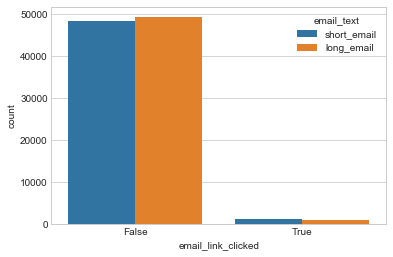

In [87]:
sns.countplot(emails.email_link_clicked,hue=emails.email_text)

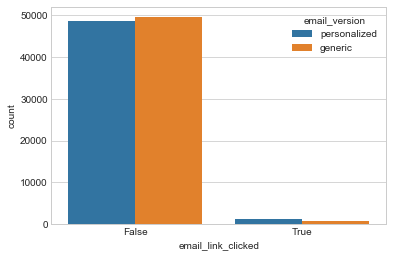

In [88]:
sns.countplot(emails.email_link_clicked,hue=emails.email_version)

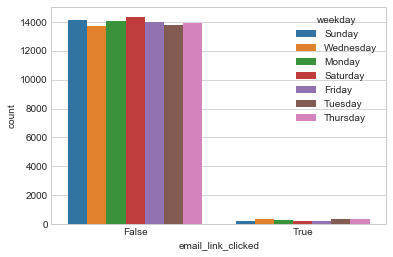

In [90]:
sns.countplot(emails.email_link_clicked,hue=emails.weekday)

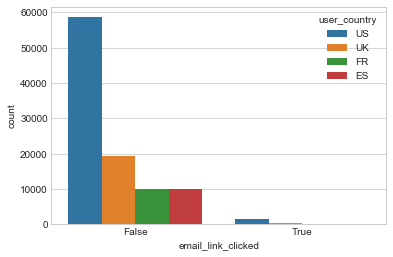

In [91]:
sns.countplot(emails.email_link_clicked,hue=emails.user_country)

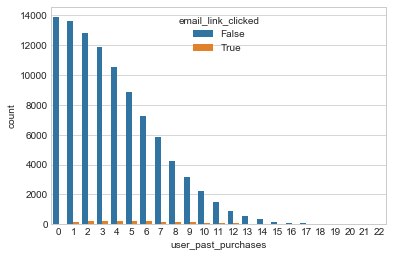

In [93]:
sns.countplot(emails.user_past_purchases,hue=emails.email_link_clicked)

### Based on all the information you have about the emails that were sent, can you build a model to optimize in future email campaigns to maximize the probability of users clicking on the link inside the email?

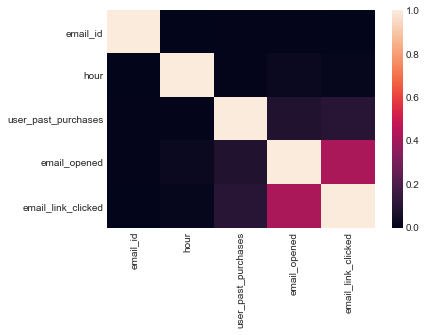

In [94]:
correlation=emails.corr()
sns.heatmap(correlation)

#### Remove Identifier

In [99]:
emails=emails.drop(['email_id'],axis=1)

#### Data Preprocessing

In [103]:
#Get dummies for categorical variables
emails=pd.get_dummies(emails)
emails.head()

,user_past_purchases,email_opened,email_link_clicked,email_text_long_email,email_text_short_email,email_version_generic,email_version_personalized,weekday_Friday,weekday_Monday,weekday_Saturday,...,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,hour_24
0,5,False,False,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,True,True,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,False,False,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,False,False,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,6,False,False,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


#### Train Test Split Cross Validation

In [107]:
X=emails.iloc[:, emails.columns != 'email_link_clicked']
y=emails.email_link_clicked
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

#### Standard Scaler

In [108]:
stdsc=StandardScaler()
X_train_std=stdsc.fit_transform(X_train)
X_test_std=stdsc.fit_transform(X_test)

#### Implement Random Forest to assess factor importances

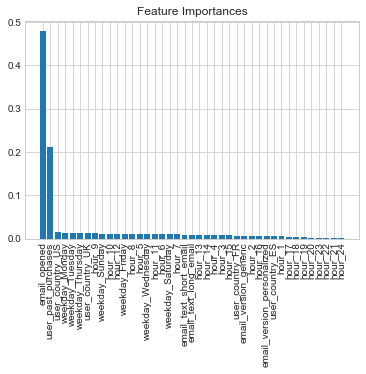

In [109]:
#Ramdom Forest
rf=RandomForestClassifier(criterion='entropy',random_state=1,n_jobs=2)
rf.fit(X_train,y_train)
features=X.columns
importances=rf.feature_importances_
indices=np.argsort(importances)[::-1]
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),importances[indices])
plt.xticks(range(X_train.shape[1]),features[indices],rotation=90)
plt.show()

#### Run predictive model

In [110]:
#Perform logistic regression
lr=LogisticRegression(C=1000.0,random_state=0)
lr.fit(X_train_std,y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [111]:
y_pred=lr.predict(X_test)

#### Evaluate Performance Metrics

In [112]:
confmat=confusion_matrix(y_test,y_pred)
confmat

array([[28962,   387],
       [  525,   126]], dtype=int64)

In [113]:
precisionscore=precision_score(y_test,y_pred)
precisionscore

0.24561403508771928

In [114]:
recallscore=recall_score(y_test,y_pred)
recallscore

0.19354838709677419

In [115]:
f1score=f1_score(y_test,y_pred)
f1score

0.21649484536082475

In [116]:
accuracyscore=accuracy_score(y_test,y_pred)
accuracyscore

0.96960000000000002